In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob 
from PIL import Image
import os 
from os import listdir
import tensorflow as tf
import keras
import keras.backend as K

from keras.optimizers import SGD, Adam, Adagrad, RMSprop
from keras.applications import *
from keras.preprocessing import *
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Activation
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [8]:
directory = r"C:\Users\GUITA\Desktop\Stuff\Notes\Digital Naturalist\Implementation\Digital Naturalist Dataset"
tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False
)

Found 138 files belonging to 3 classes.


<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [9]:
directory = r"C:\Users\GUITA\Desktop\Stuff\Notes\Digital Naturalist\Implementation\Digital Naturalist Dataset"
folders=listdir(directory) 
def getListOfFiles (directory) :
    listOfFile = os.listdir (directory)
    allFiles = list()
    for fol_name in listOfFile:
        fullPath = os.path.join(directory,fol_name)
        allFiles.append(fullPath)
    return allFiles
Folders = getListOfFiles(directory)
len(Folders)
subfolders = []
for num in range (len (Folders)):
    sub_fols = getListOfFiles (Folders [num])
    subfolders+=sub_fols
subfolders

['C:\\Users\\GUITA\\Desktop\\Stuff\\Notes\\Digital Naturalist\\Implementation\\Digital Naturalist Dataset\\Bird\\Great Indian Bustard Bird',
 'C:\\Users\\GUITA\\Desktop\\Stuff\\Notes\\Digital Naturalist\\Implementation\\Digital Naturalist Dataset\\Bird\\Spoon Billed Sandpiper Bird',
 'C:\\Users\\GUITA\\Desktop\\Stuff\\Notes\\Digital Naturalist\\Implementation\\Digital Naturalist Dataset\\Flower\\Corpse Flower',
 'C:\\Users\\GUITA\\Desktop\\Stuff\\Notes\\Digital Naturalist\\Implementation\\Digital Naturalist Dataset\\Flower\\Lady Slipper Orchid Flower',
 'C:\\Users\\GUITA\\Desktop\\Stuff\\Notes\\Digital Naturalist\\Implementation\\Digital Naturalist Dataset\\Mammal\\Pangolin Mammal',
 'C:\\Users\\GUITA\\Desktop\\Stuff\\Notes\\Digital Naturalist\\Implementation\\Digital Naturalist Dataset\\Mammal\\Senenca White Deer Mammal']

In [10]:
X_data=[]
Y_data=[]
id_no=0
found=[]
for paths in subfolders:
    files=glob.glob(paths+"/*.jpg")
    found.append((paths.split('\\')[-2],paths.split('\\')[-1]))
    for myFile in files:
        img=Image.open(myFile)
        img=img.resize((256,256),Image.ANTIALIAS)
        img=np.array(img)
        if img.shape==(256,256,3):
            X_data.append(img)
            Y_data.append(id_no)
    id_no+=1

In [11]:
#print (X_data)
#print (Y_data)
X = np.array(X_data)
Y = np.array(Y_data)
#print("x-shape", X. shape, "y shape", Y.shape)
X = X.astype('float32')/255.0
y_cat = to_categorical (Y_data, len (subfolders)) 
#print("X shape",X, "y_cat_shape", y_cat) 
#print("X shape", X.shape, "y_cat shape", y_cat.shape)
X_train, X_test, y_train, y_test = train_test_split (X, y_cat, test_size=0.2) 
print("The model has " + str(len(X_train)) + " inputs")

The model has 110 inputs


In [12]:
IMAGE_SIZE = [256,256]
inception = InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

87916544/87910968 [==============================] - 240s 3us/step


In [13]:
for layer in inception.layers:
    layer.trainable = False
    
for layer in inception.layers[250:]:
    layer.trainable = True

In [14]:
def load_CNN (output_size):
    model = Sequential()
    model.add(inception)
    model.add(Flatten())
    model.add(Dense(output_size, activation = 'softmax'))
    return model

In [15]:
early_stop_loss = EarlyStopping(monitor='val_accuracy', patience=5,verbose=1,mode='auto') 
learning_rate = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,patience=5, min_lr=0.00001) 
model_callbacks = [early_stop_loss, learning_rate ]

In [38]:
def load_CNN (output_size):
    K.clear_session()
    model=Sequential() 
    model.add(Dropout (0.4, input_shape=(224, 224, 3)))
    
    model.add(Conv2D (256, (5, 5), input_shape=(224, 224, 3), activation='relu')) 
    model.add(MaxPool2D (pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D (128, (3, 3), activation='relu'))
    model.add(MaxPool2D (pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D (64, (3, 3), activation='relu')) 
    model.add(MaxPool2D (pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense (512, activation='relu'))
    model.add(Dropout (0.3))
    model.add(Dense (256, activation='relu'))
    model.add(Dropout (0.3))
    model.add(Dense (128, activation='relu'))
    model.add(Dropout (0.3))
    
    model.add(Dense(output_size, activation='softmax'))
    
    return model

In [10]:
def load_CNN (output_size):
    K.clear_session()
    model = Sequential()
    model.add(Conv2D (32, kernel_size=(3,3), activation= 'relu', input_shape=(224,224,3)))
    model.add(Conv2D (64, (3,3), activation= 'relu')) 
    model.add(MaxPooling2D (pool_size=(2,2)))
    model.add(Dropout (0.25))
    model.add(Conv2D (64, (3,3), activation='relu'))
    model.add(MaxPooling2D (pool_size=(2,2)))
    model.add(Dropout (0.25))
    model.add(Conv2D (128, (3,3), activation='relu'))
    model.add(MaxPooling2D (pool_size=(2,2)))
    model.add(Dropout (0.25))
    model.add(Flatten())
    model.add(Dense (64, activation='relu'))
    model.add(Dropout (0.5))
    model.add(Dense (output_size, activation='sigmoid'))
    return model
    

In [16]:
model = load_CNN(6) 
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam (lr=0.001), 
              metrics=['accuracy']) 
model.summary() 
weights = model.get_weights()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 6, 6, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0         
_________________________________________________________________
dense (Dense)                (None, 6)                 442374    
Total params: 22,245,158
Trainable params: 10,983,814
Non-trainable params: 11,261,344
_________________________________________________________________


In [17]:
histories_acc = []
histories_val_acc = []
histories_loss = []
histories_val_loss = []

model.set_weights(weights)
h=model.fit(X_train, y_train,
batch_size=16,
epochs=50,
verbose=1,
callbacks=[early_stop_loss],
shuffle=True,
validation_data= (X_test, y_test))

Epoch 1/50
7/7 [==============================] - 10s 878ms/step - loss: 9.4521 - accuracy: 0.3704 - val_loss: 3.8182 - val_accuracy: 0.8214
Epoch 2/50
7/7 [==============================] - 5s 701ms/step - loss: 1.1433 - accuracy: 0.8484 - val_loss: 12.2828 - val_accuracy: 0.8214
Epoch 3/50
7/7 [==============================] - 5s 704ms/step - loss: 0.1744 - accuracy: 0.9682 - val_loss: 64.8471 - val_accuracy: 0.6429
Epoch 4/50
7/7 [==============================] - 5s 706ms/step - loss: 0.1055 - accuracy: 0.9903 - val_loss: 172.2299 - val_accuracy: 0.4286
Epoch 5/50
7/7 [==============================] - 5s 774ms/step - loss: 0.0720 - accuracy: 0.9919 - val_loss: 131.0648 - val_accuracy: 0.4643
Epoch 6/50
7/7 [==============================] - 6s 805ms/step - loss: 0.0276 - accuracy: 0.9878 - val_loss: 9.7720 - val_accuracy: 0.8571
Epoch 7/50
7/7 [==============================] - 6s 807ms/step - loss: 0.2956 - accuracy: 0.9748 - val_loss: 1.1392 - val_accuracy: 0.9643
Epoch 8/50
7/

In [18]:
print(h.history.keys())
histories_acc.append(h.history['accuracy'])
histories_val_acc.append(h.history['val_accuracy'])
histories_loss.append(h.history['loss'])
histories_val_loss.append(h.history['val_loss'])

histories_acc = np.array(histories_acc)
histories_val_acc = np.array(histories_val_acc) 
histories_loss = np.array(histories_loss) 
histories_val_loss = np.array(histories_val_loss)

print('histories_acc',histories_acc,
'histories_loss', histories_loss,
'histories_val_acc', histories_val_acc,
'histories_val_loss', histories_val_loss)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
histories_acc [[0.5181818  0.88181818 0.95454544 0.9909091  0.9727273  0.9818182
  0.96363634 0.96363634 1.         0.9727273  0.9909091  1.
  1.        ]] histories_loss [[7.57305479e+00 7.63947904e-01 3.47196549e-01 9.91847217e-02
  1.90968975e-01 3.73343192e-02 2.89767534e-01 3.22231472e-01
  2.13171865e-04 6.47635087e-02 1.67788807e-02 2.18041078e-03
  3.24564520e-03]] histories_val_acc [[0.8214286  0.8214286  0.64285713 0.42857143 0.4642857  0.85714287
  0.96428573 1.         1.         1.         0.96428573 0.9285714
  0.9285714 ]] histories_val_loss [[3.81815839e+00 1.22828341e+01 6.48470993e+01 1.72229874e+02
  1.31064819e+02 9.77200603e+00 1.13918805e+00 2.09677004e-04
  1.72792425e-04 1.01574406e-05 2.80951440e-01 2.86201262e+00
  1.76318395e+00]]


17


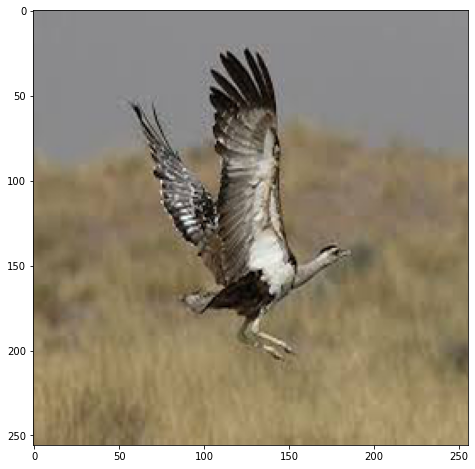

In [19]:
image_number = np.random.randint(0, len (X_test)) 
print(image_number)
plt.figure(figsize=(8, 8))
plt.imshow(X_test[image_number])

In [21]:
predictions = model.predict_proba([X_test[image_number].reshape(1, 256,256,3)])

for idx, result, x in zip(range(0,6), found, predictions[0]): 
    print("Label: {}, Type: {}, Species: {}, Score: {}%".format(idx, result[0],result[1], round(x*100,3)))

ClassIndex=model.predict_classes([X_test[image_number].reshape(1, 256,256,3)])
ClassIndex
print (found[ClassIndex[0]])

C:\Users\GUITA\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Label: 0, Type: Bird, Species: Great Indian Bustard Bird, Score: 100.0%
Label: 1, Type: Bird, Species: Spoon Billed Sandpiper Bird, Score: 0.0%
Label: 2, Type: Flower, Species: Corpse Flower, Score: 0.0%
Label: 3, Type: Flower, Species: Lady Slipper Orchid Flower, Score: 0.0%
Label: 4, Type: Mammal, Species: Pangolin Mammal, Score: 0.0%
Label: 5, Type: Mammal, Species: Senenca White Deer Mammal, Score: 0.0%
('Bird', 'Great Indian Bustard Bird')


C:\Users\GUITA\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [22]:
model_json = model.to_json() #indent=2 
with open("final_model.json", "w") as json_file: 
    json_file.write(model_json)

model.save_weights("final_model.h5") 
print("Saved model to disk")

Saved model to disk
